In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data-Set Exploration

Explore the initial data sets to get insight and clean-up.

In [34]:
# load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
# train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


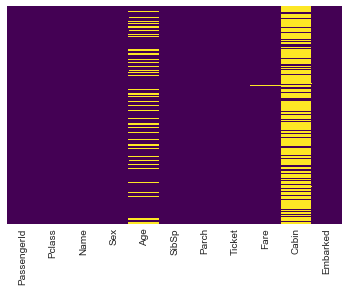

In [36]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
sns.set_style('whitegrid')

In [40]:
# sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')


In [41]:
# sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\Tim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


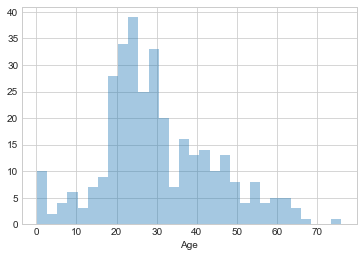

In [42]:
# sns.distplot(train['Age'].dropna(),kde=False,bins=30)
sns.distplot(test['Age'].dropna(),kde=False,bins=30)

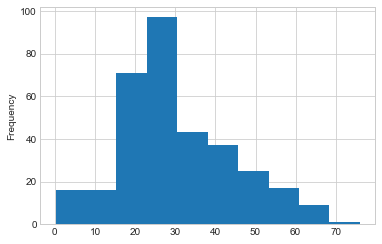

In [43]:
# train['Age'].plot.hist()
test['Age'].plot.hist()

In [44]:
# train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


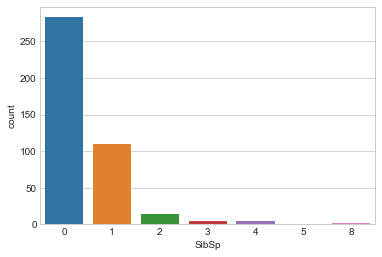

In [45]:
# sns.countplot(x='SibSp',data=train)
sns.countplot(x='SibSp',data=test)

In [46]:
# train['Fare'].hist(bins=40,figsize=(10,4))

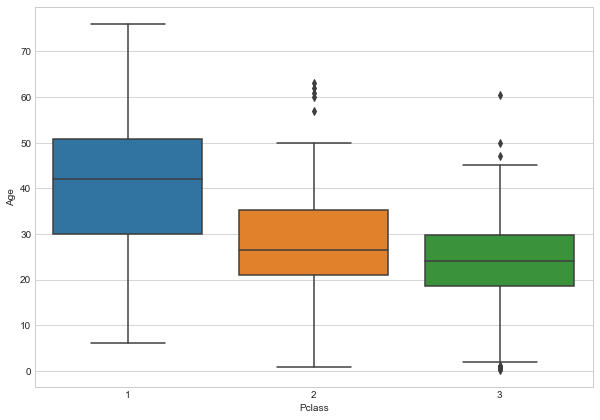

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [18]:
train[train['Pclass'] == 1]['Age'].dropna().mean()
# test[test['Pclass'] == 1]['Age'].dropna().mean()

38.12347301778713

In [19]:
train[train['Pclass'] == 2]['Age'].dropna().mean()
# test[test['Pclass'] == 2]['Age'].dropna().mean()

29.877630057803472

In [20]:
train[train['Pclass'] == 3]['Age'].dropna().mean()
# test[test['Pclass'] == 3]['Age'].dropna().mean()

25.140619718309818

In [21]:
train[train['Pclass'] == 1]['Fare'].dropna().mean()

84.19351635514012

In [22]:
train[train['Pclass'] == 2]['Fare'].dropna().mean()

20.66218315217391

In [23]:
train[train['Pclass'] == 3]['Fare'].dropna().mean()

13.675550101832997

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return test[test['Pclass'] == 1]['Age'].dropna().mean()
        elif Pclass == 2:
            return test[test['Pclass'] == 2]['Age'].dropna().mean()
        else:
            return test[test['Pclass'] == 3]['Age'].dropna().mean()
        
    else:
        return Age

In [53]:
# train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

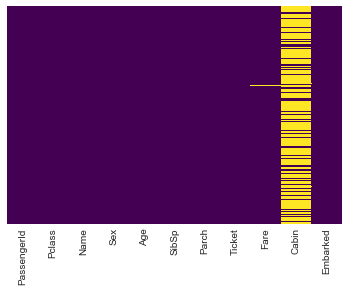

In [54]:
# sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
test.drop('Cabin',axis=1,inplace=True)

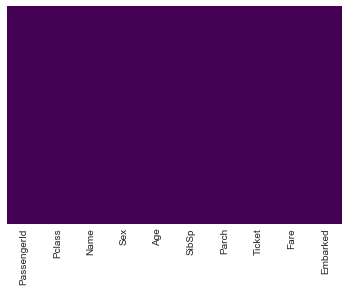

In [58]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
test.dropna(inplace=True)

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [60]:
# sex = pd.get_dummies(train['Sex'],drop_first=True)
sex = pd.get_dummies(test['Sex'],drop_first=True)

In [61]:
# embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [62]:
# train = pd.concat([train, sex, embark],axis=1)
test = pd.concat([train, sex, embark],axis=1)

In [63]:
# train.head()
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


In [64]:
# train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [65]:
test.drop('PassengerId',axis=1,inplace=True)

In [30]:
# train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [66]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,1.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,C85,0.0,0.0,1.0
2,1,3,26.0,0,0,7.9250,NaN,1.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,C123,1.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,NaN,0.0,0.0,1.0


## Load Training and Test Data

Create a model with the above training data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load pickle for basic training dataset
train = pd.read_pickle("train1.pkl")

# create a data-frame with the passengerid
train_pid = pd.DataFrame(train['PassengerId'])

In [25]:
train_pid.head()

,PassengerId
0,1
1,2
2,3
3,4
4,5


In [26]:
# load pickle for basic testing dataset
test = pd.read_pickle("test1.pkl")

# create a data-frame with the passengerid
test_pid = pd.DataFrame(test['PassengerId'])

In [27]:
test_pid.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


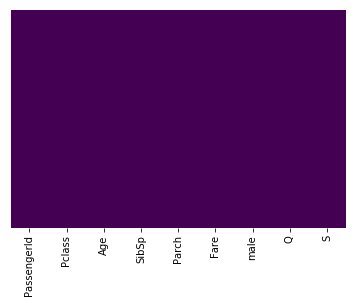

In [28]:
# check to see where the test data set has null fields
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
test = test.drop('PassengerId', axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [31]:
test.to_csv('test_sample.csv',index=False)

In [32]:
X = train.drop(['PassengerId','Survived'], axis=1)
y = train['Survived']

In [33]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
# logmodel.fit(X_train,y_train)
logmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
prediction = logmodel.predict(test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
# print(classification_report(test,prediction))
logreg_pred = pd.DataFrame()
logreg_pred['PassengerId'] = test_pid['PassengerId']
logreg_pred['Survived'] = prediction

In [42]:
logreg_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
logreg_pred.to_csv('logreg_pred.csv',index=False)